# Section 4: Error Analysis for Regression Models

## Airbnb Dataset - Comprehensive Error Analysis

This notebook provides comprehensive error analysis for regression models trained on the Airbnb price prediction dataset.

**Analysis Components:**
- **Cross-Model Error Comparison**: Compare error patterns across XGBoost Enhanced, FT-Transformer Enhanced, and SAINT Enhanced
- **Residual Analysis**: Detailed residual pattern analysis for each model
- **Feature-based Error Analysis**: Which features cause prediction errors
- **Model-Specific Insights**: Deep dive into each model's error characteristics
- **Business Insights**: Actionable recommendations for Airbnb pricing operations

**Models Analyzed:**
- XGBoost Enhanced, FT-Transformer Enhanced (Improved), SAINT Enhanced
- Focus on understanding prediction errors for Airbnb price prediction

## 1. Import Required Libraries and Functions

In [1]:
# Import the error analysis functions from our custom module
from section4_error_analysis_functions import (
    setup_error_analysis_environment,
    load_regression_models_and_data,
    generate_model_predictions,
    calculate_regression_errors,
    analyze_residuals,
    perform_cross_model_error_comparison,
    analyze_feature_based_errors,
    generate_error_visualizations,
    analyze_model_specific_errors,
    generate_business_insights,
    save_error_analysis_results,
    run_complete_error_analysis,
    compare_error_patterns_across_models,
    analyze_temporal_error_patterns
)

# Import additional libraries for display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Memory management utilities
import gc
import pickle
import os

## 2. Setup Error Analysis Environment

In [2]:
# Setup the error analysis environment
setup_error_analysis_environment()

🔍 Section 4: Regression Error Analysis
Dataset: Airbnb Price Prediction
✅ Error analysis environment setup complete!


True

## 3. Option 1: Run Complete Error Analysis Pipeline (Recommended)

This single function call will run the entire error analysis pipeline:

🚀 STARTING COMPLETE ERROR ANALYSIS PIPELINE
🔍 Section 4: Regression Error Analysis
Dataset: Airbnb Price Prediction
✅ Error analysis environment setup complete!

📂 Loading trained models and data...
📊 Loading preprocessed data...
✅ Enhanced data loaded successfully!
   Test samples: 9,777
   Features: 43 (after feature engineering & selection)
   Target transformation: boxcox
   Outliers removed: 2263
🔄 Loading all available models...
📦 Loading Enhanced XGBoost model...
   ✅ Loaded XGBoost Enhanced (Tuned) from ./Section2_Model_Training/xgboost_tuned_enhanced.pkl
✅ XGBoost Enhanced (Tuned) loaded successfully!
📦 Loading Improved FT-Transformer model...
✅ Improved FT-Transformer loaded successfully!
📦 Loading Enhanced SAINT model...
   ✅ Using improved SAINT training module
   ✅ Loaded SAINT model from ./Section2_Model_Training/improved_saint_model.pkl
✅ Enhanced SAINT loaded successfully!
✅ Successfully loaded 3 models: ['XGBoost Enhanced', 'FT-Transformer Enhanced', 'SAINT Enhanced']


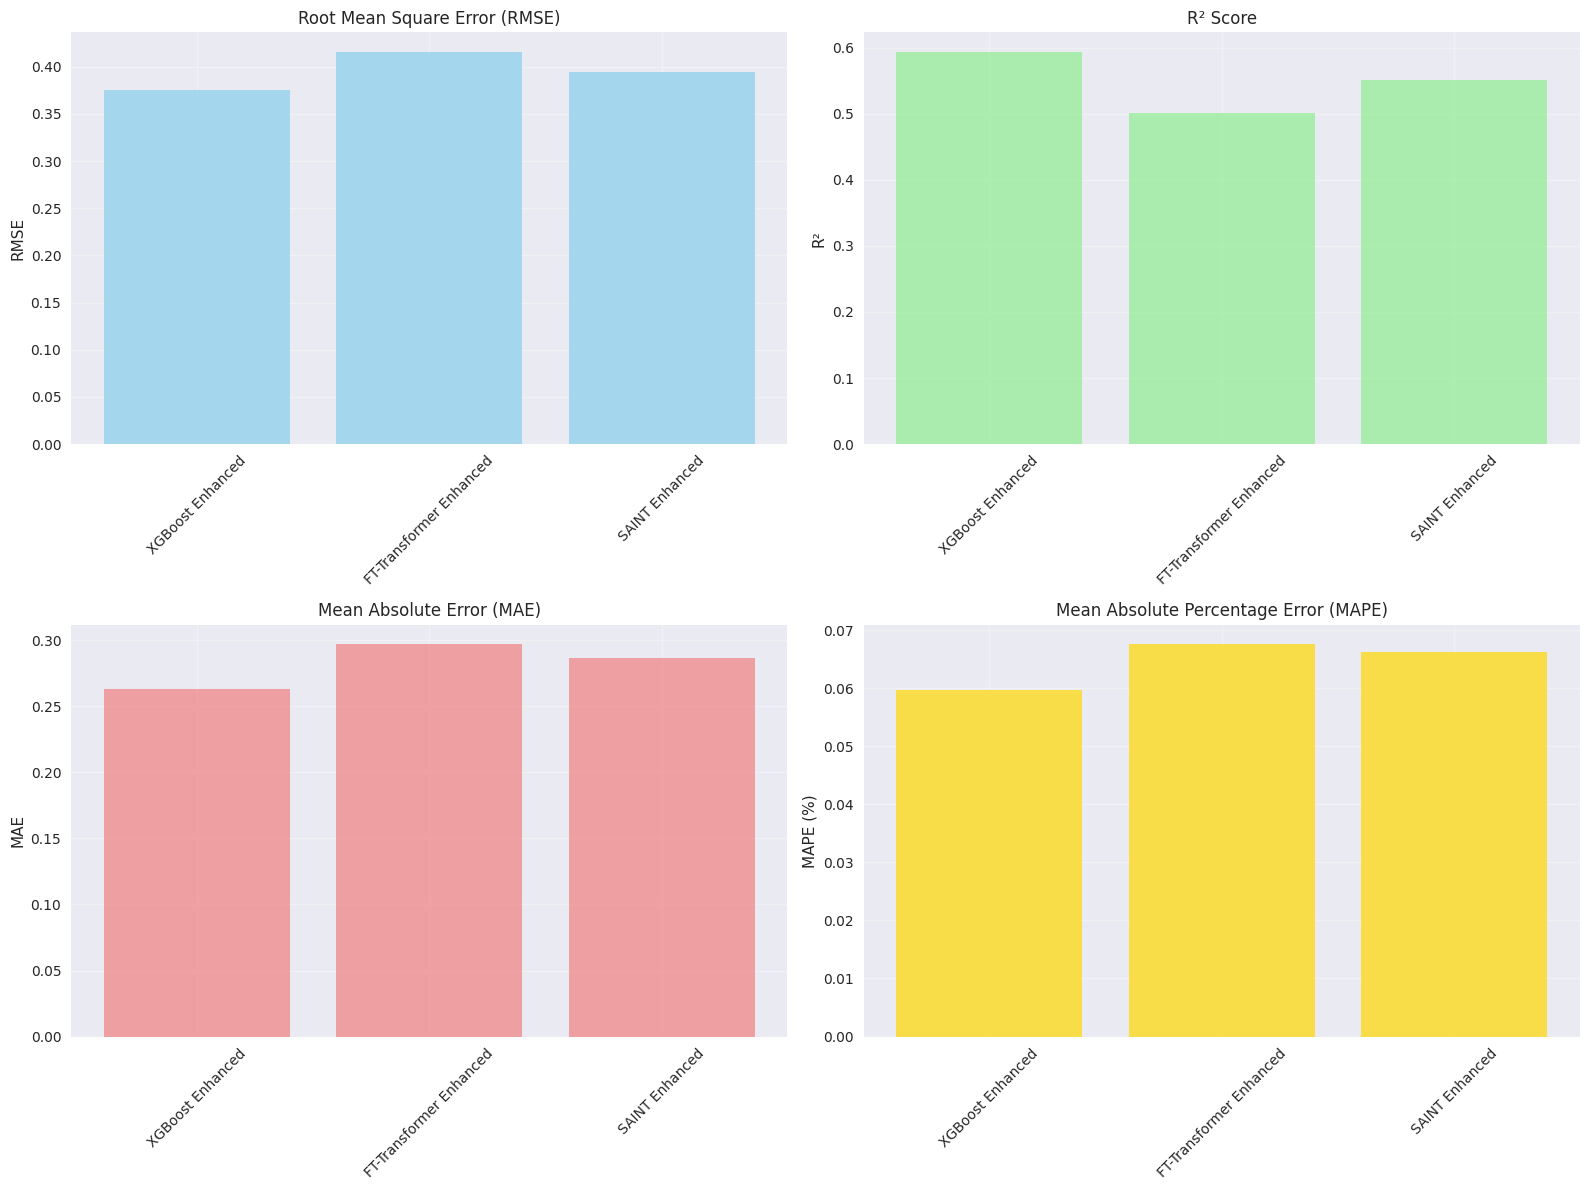

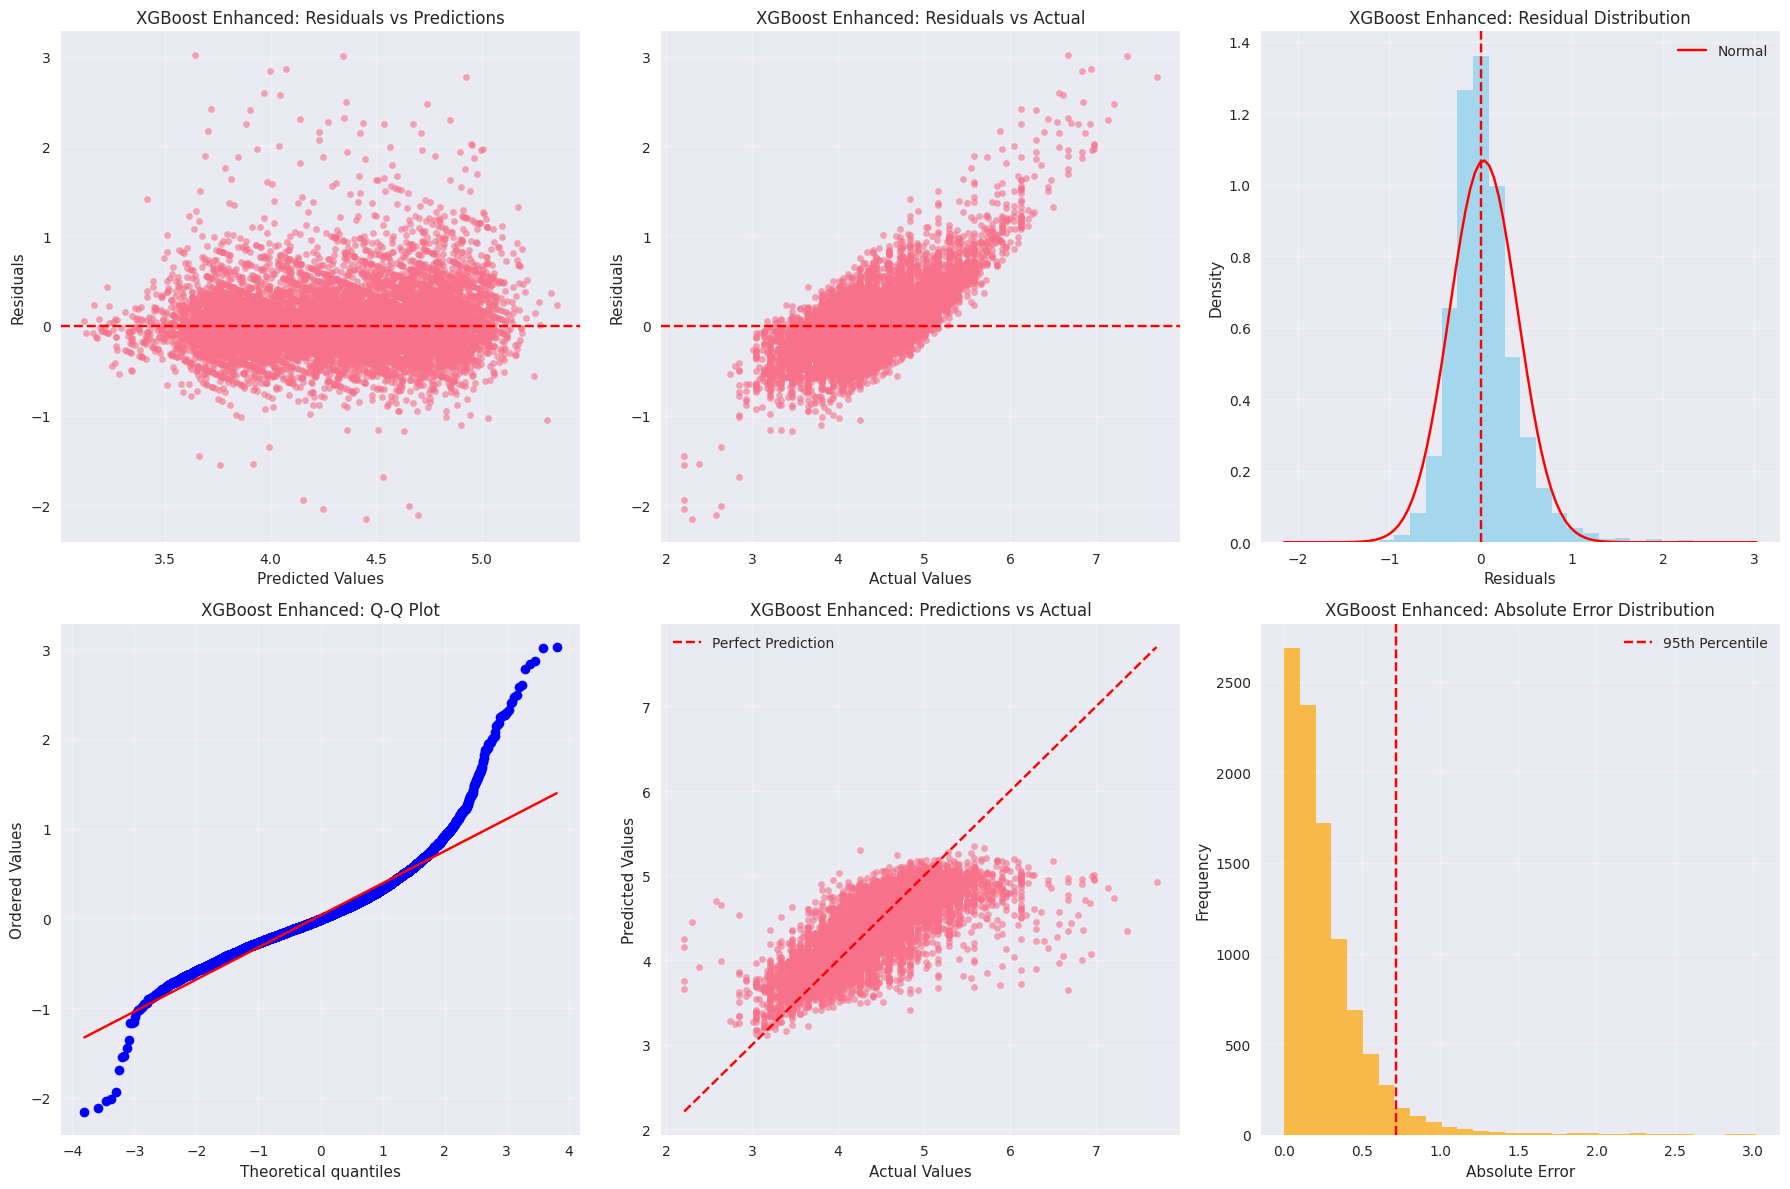

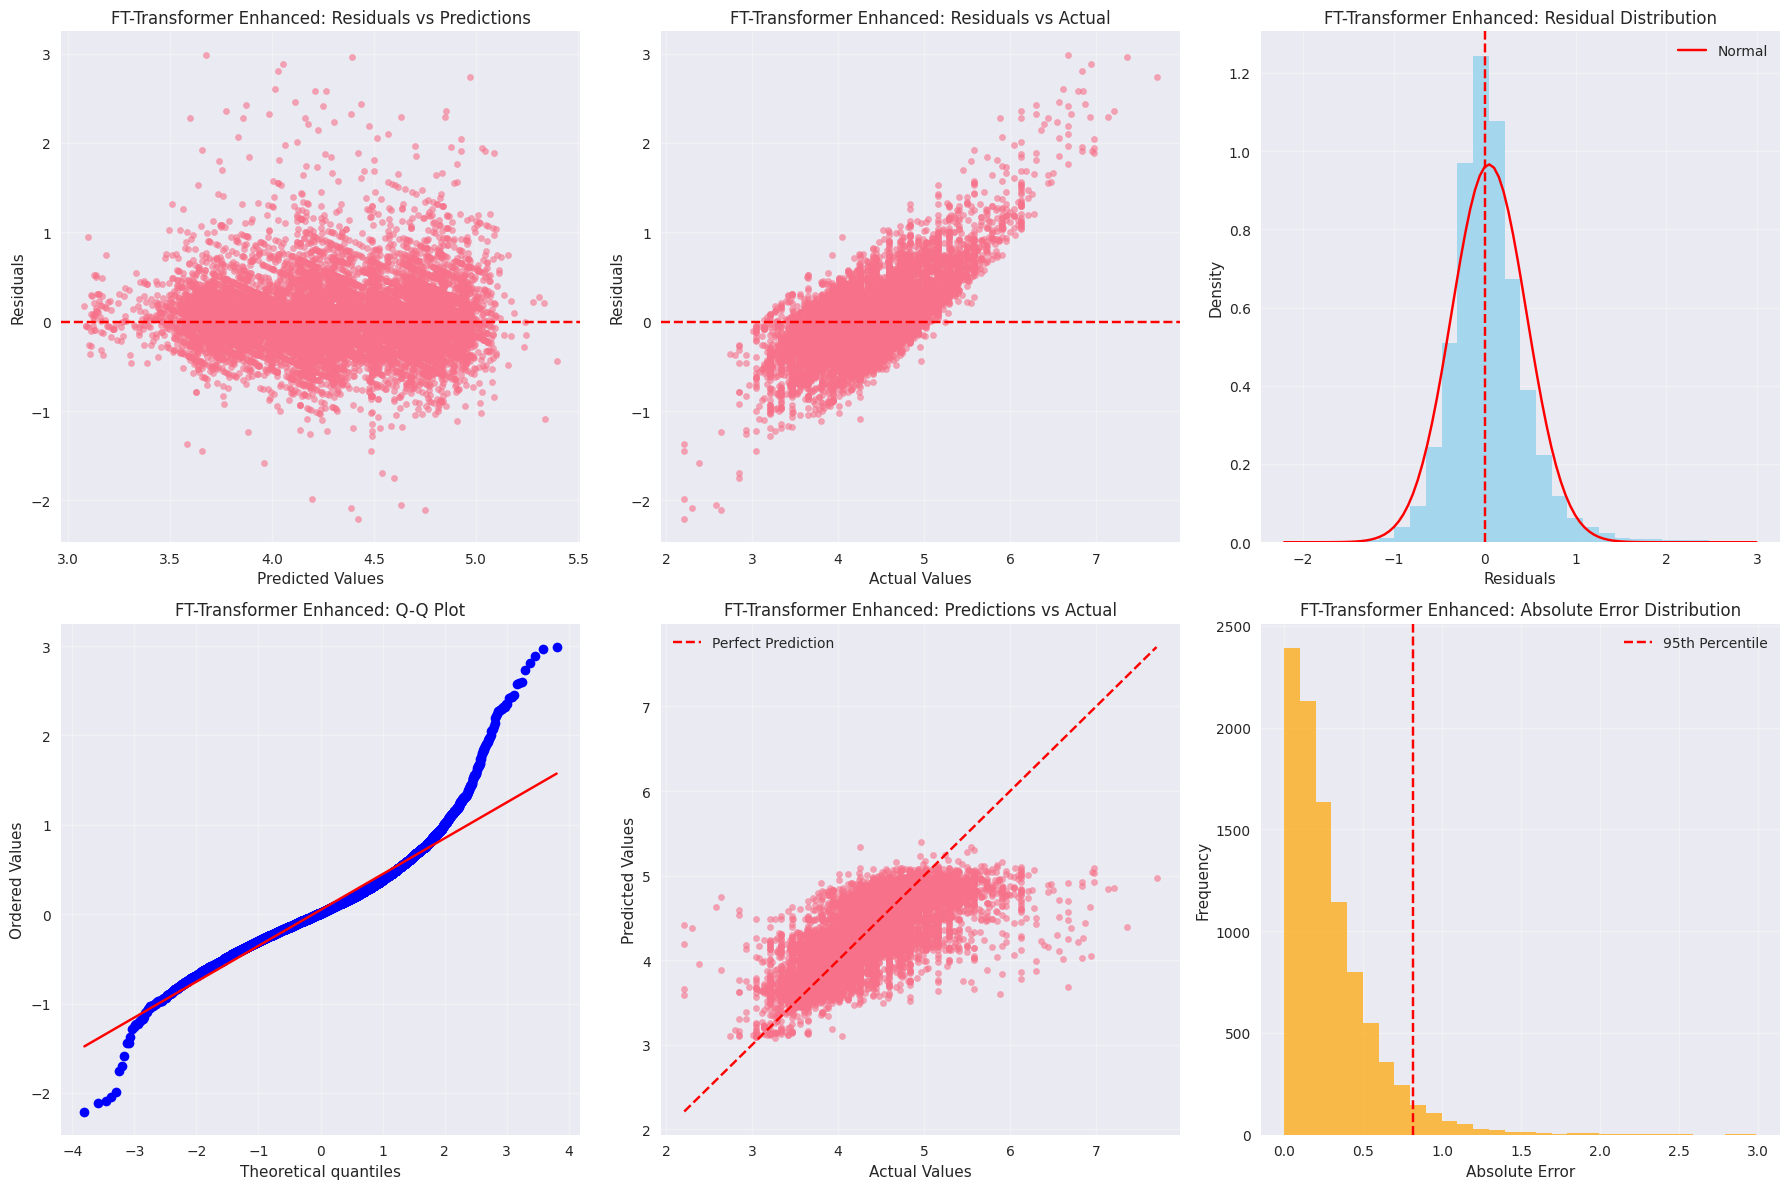

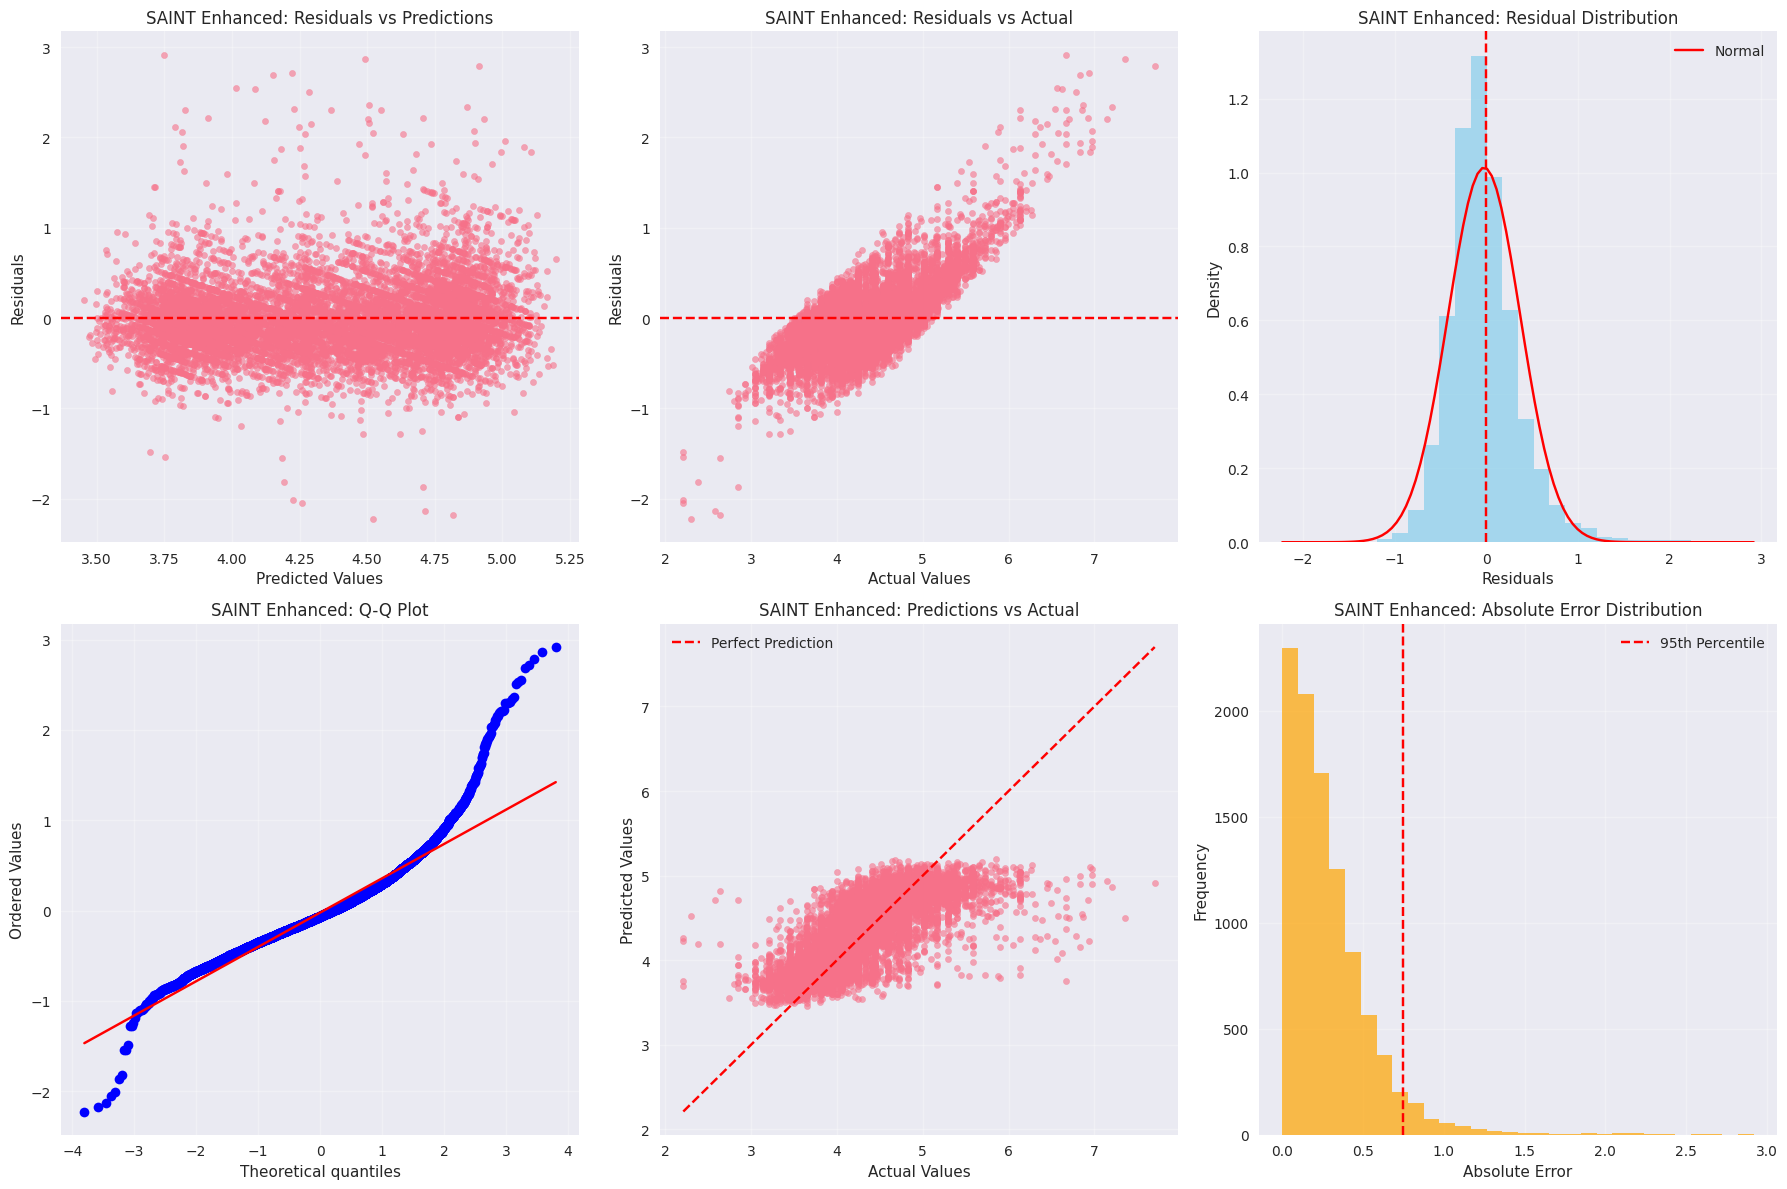

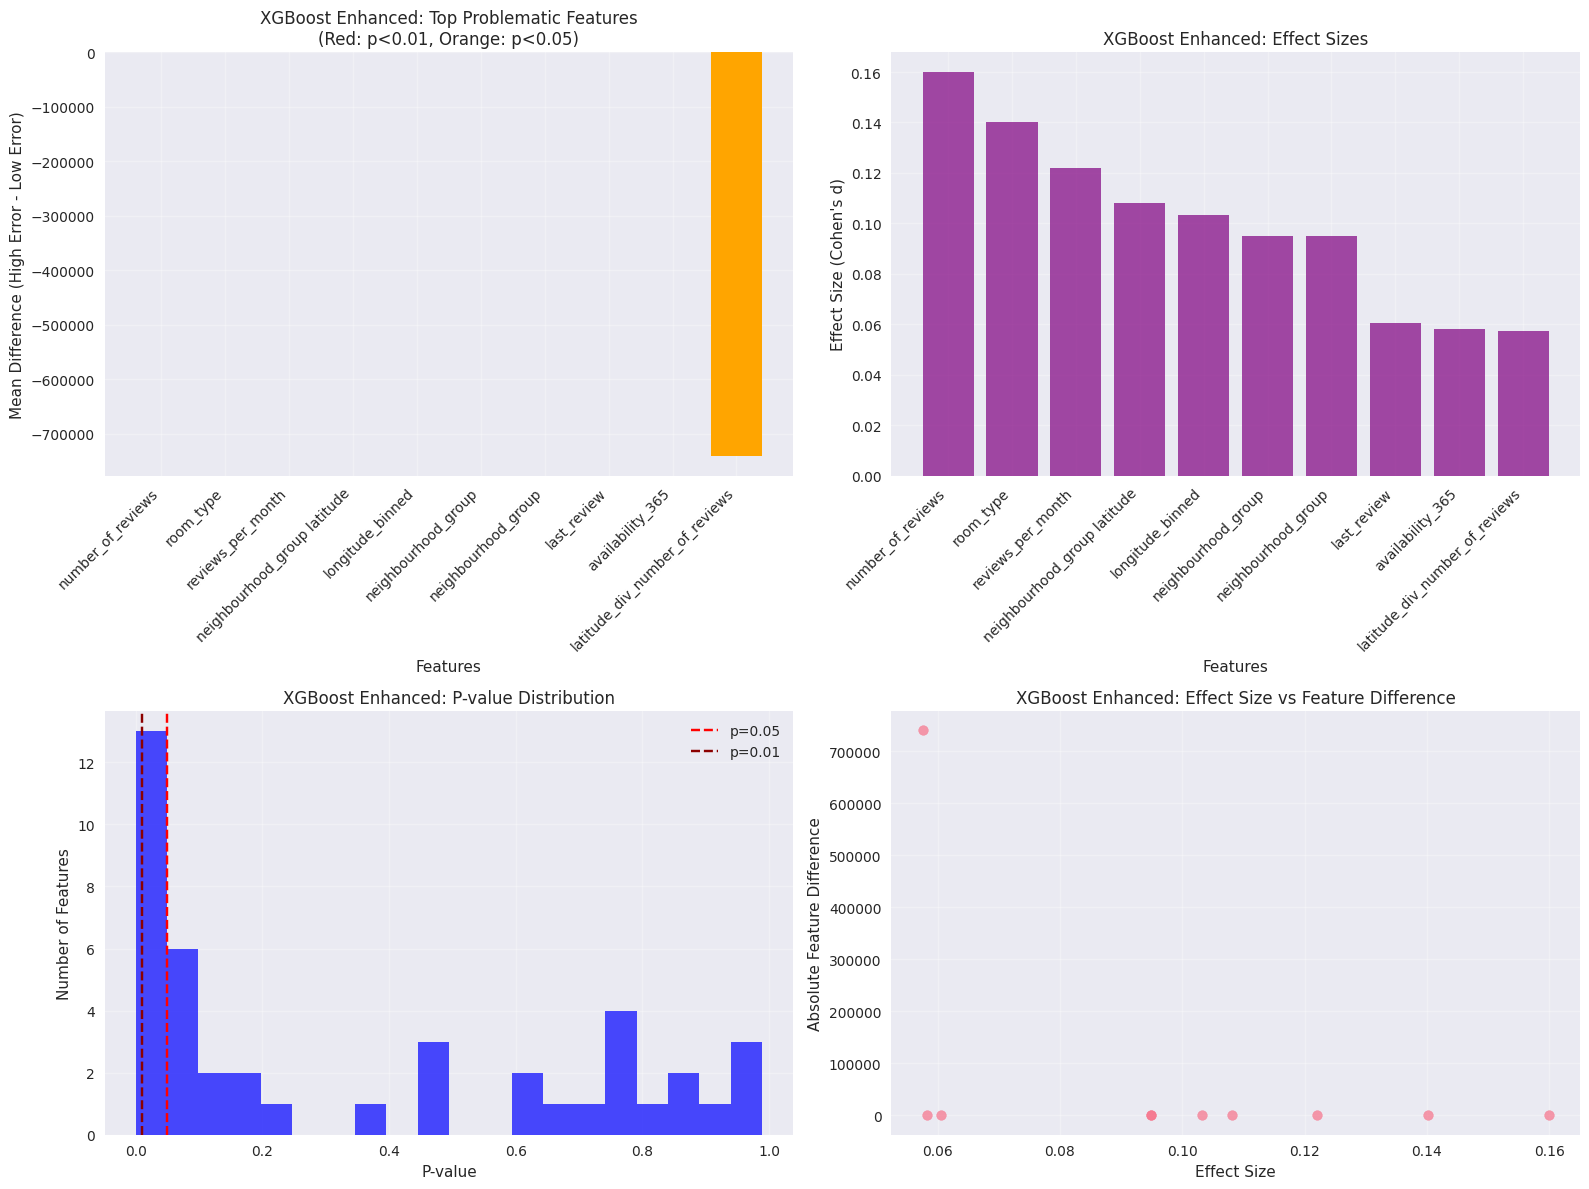

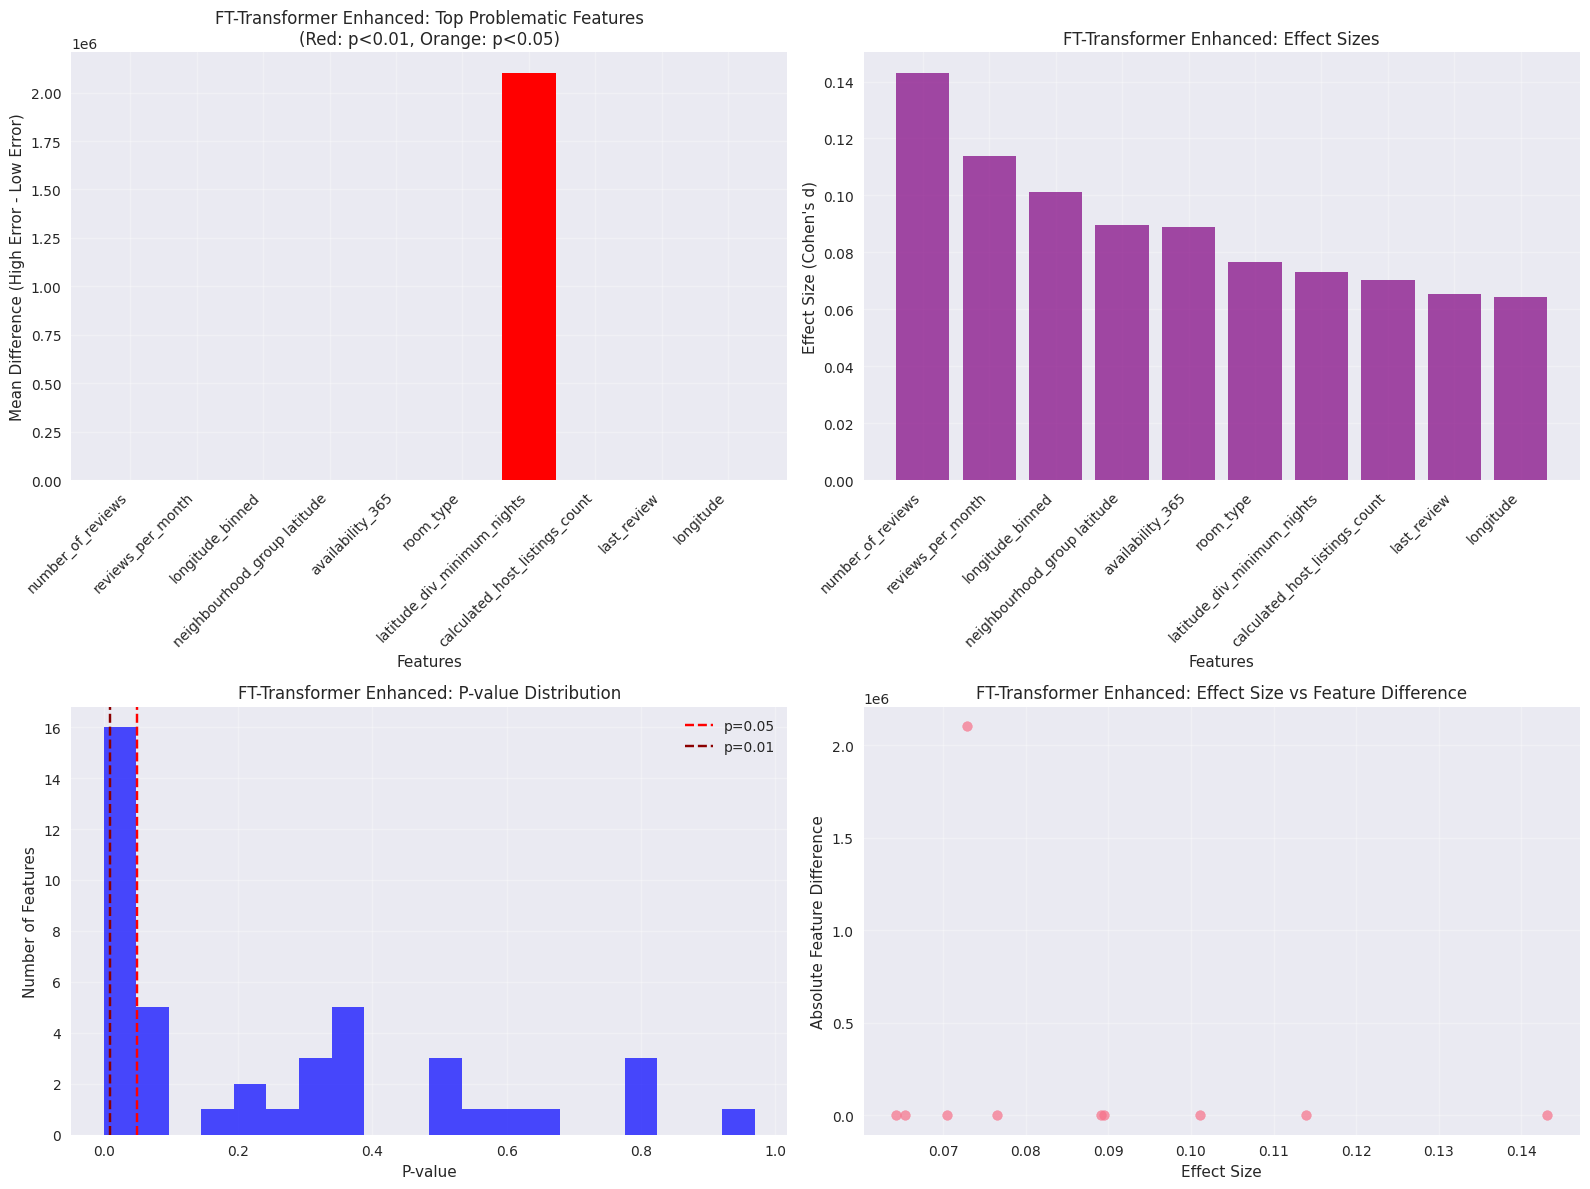

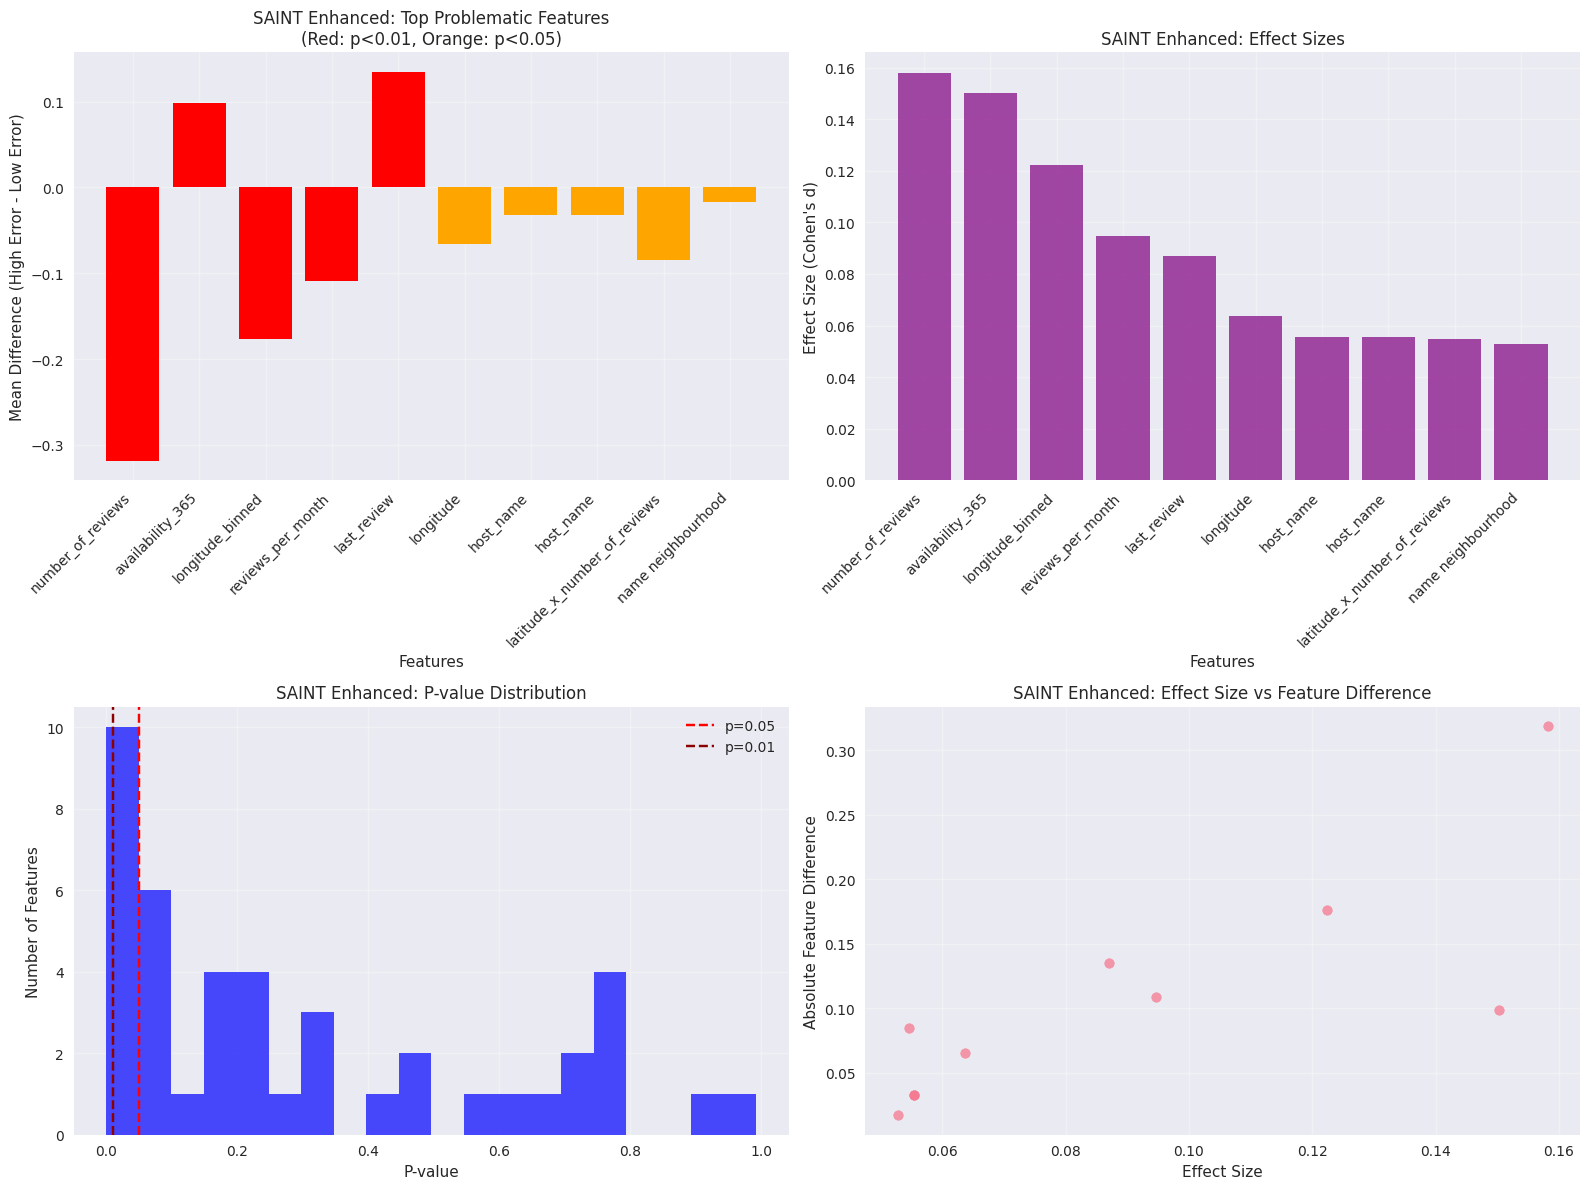


🔍 MODEL-SPECIFIC ERROR ANALYSIS

📊 XGBOOST ENHANCED ERROR ANALYSIS
------------------------------------------------------------
RMSE: 0.3750
MAE: 0.2630
R²: 0.5939
MAPE: 0.06%
Max Error: 3.0241
95th Percentile Error: 0.7135

Residual Analysis:
  Mean: 0.0335
  Std: 0.3735
  Skewness: 1.3314
  Kurtosis: 6.7512
🌳 XGBoost-Specific Insights:
  - Tree-based model captures non-linear relationships well
  - Large errors may indicate insufficient trees or depth
  - Consider feature engineering for better performance
  - Residual patterns suggest potential overfitting if highly skewed

📊 FT-TRANSFORMER ENHANCED ERROR ANALYSIS
------------------------------------------------------------
RMSE: 0.4157
MAE: 0.2969
R²: 0.5009
MAPE: 0.07%
Max Error: 2.9896
95th Percentile Error: 0.8149

Residual Analysis:
  Mean: 0.0473
  Std: 0.4130
  Skewness: 0.9890
  Kurtosis: 4.6807
🤖 FT-Transformer-Specific Insights:
  - Attention mechanism captures feature interactions
  - Large errors may indicate insufficie

In [3]:
# Run the complete error analysis pipeline
results = run_complete_error_analysis(
    section2_results_file='./airbnb_section2_results.pkl',
    preprocessed_data_file='./airbnb_preprocessed_data.pkl'
)

if results:
    print("\n🎉 Complete error analysis finished!")
    print(f"📊 Models analyzed: {results['models_analyzed']}")
    print(f"📁 Results saved to: {results['results_dir']}")
    print(f"🏆 Best model: {results['business_insights']['best_model']}")
else:
    print("❌ Error analysis failed. Please check the logs above.")

## 4. Option 2: Step-by-Step Error Analysis (For Detailed Control)

If you prefer to run the analysis step-by-step for more control, use the following cells:

### 4.1 Load Models and Data

In [4]:
# Load regression models and data
data = load_regression_models_and_data()

if data and data['models']:
    print(f"\n📊 Data loaded successfully!")
    print(f"Models available: {list(data['models'].keys())}")
    print(f"Features: {len(data['feature_names'])}")
    print(f"Test samples: {len(data['X_test_scaled']):,}")
    
    # Extract variables for step-by-step analysis
    models = data['models']
    X_test_scaled = data['X_test_scaled']
    y_test = data['y_test']
    feature_names = data['feature_names']
    device = data['device']
else:
    print("❌ Failed to load models and data")


📂 Loading trained models and data...
📊 Loading preprocessed data...
✅ Enhanced data loaded successfully!
   Test samples: 9,777
   Features: 43 (after feature engineering & selection)
   Target transformation: boxcox
   Outliers removed: 2263
🔄 Loading all available models...
📦 Loading Enhanced XGBoost model...
   ✅ Loaded XGBoost Enhanced (Tuned) from ./Section2_Model_Training/xgboost_tuned_enhanced.pkl
✅ XGBoost Enhanced (Tuned) loaded successfully!
📦 Loading Improved FT-Transformer model...
✅ Improved FT-Transformer loaded successfully!
📦 Loading Enhanced SAINT model...
   ✅ Using improved SAINT training module
   ✅ Loaded SAINT model from ./Section2_Model_Training/improved_saint_model.pkl
✅ Enhanced SAINT loaded successfully!
✅ Successfully loaded 3 models: ['XGBoost Enhanced', 'FT-Transformer Enhanced', 'SAINT Enhanced']

✅ Data loaded successfully!
   Models available: ['XGBoost Enhanced', 'FT-Transformer Enhanced', 'SAINT Enhanced']
   Features: 43
   Training samples: 29,022
 

### 4.2 Generate Model Predictions

In [5]:
# Generate predictions from all models
predictions, prediction_details = generate_model_predictions(models, X_test_scaled, device)

if predictions:
    print(f"\n✅ Predictions generated for {len(predictions)} models")
    for model_name, y_pred in predictions.items():
        print(f"   {model_name}: {len(y_pred)} predictions")
else:
    print("❌ No predictions generated")


🔮 Generating predictions from all models...
   Processing XGBoost Enhanced...
     ✅ Generated 9777 predictions
   Processing FT-Transformer Enhanced...
     🔧 Applied target inverse scaling for FT-Transformer Enhanced
     ✅ Generated 9777 predictions
   Processing SAINT Enhanced...
     ✅ Generated 9777 predictions

✅ Predictions generated for 3 models

✅ Predictions generated for 3 models
   XGBoost Enhanced: 9777 predictions
   FT-Transformer Enhanced: 9777 predictions
   SAINT Enhanced: 9777 predictions


### 4.3 Calculate Error Metrics

In [6]:
# Calculate comprehensive error metrics
error_metrics = calculate_regression_errors(predictions, y_test)

print("\n📊 ERROR METRICS SUMMARY")
print("=" * 60)
for model_name, metrics in error_metrics.items():
    print(f"\n{model_name}:")
    print(f"   RMSE: {metrics['RMSE']:.4f}")
    print(f"   MAE:  {metrics['MAE']:.4f}")
    print(f"   R²:   {metrics['R2']:.4f}")
    print(f"   MAPE: {metrics['MAPE']:.2f}%")


📊 Calculating regression error metrics...
   XGBoost Enhanced: RMSE=0.3750, MAE=0.2630, R²=0.5939
   FT-Transformer Enhanced: RMSE=0.4157, MAE=0.2969, R²=0.5009
   SAINT Enhanced: RMSE=4.2086, MAE=4.1887, R²=-50.1619

📊 ERROR METRICS SUMMARY

XGBoost Enhanced:
   RMSE: 0.3750
   MAE:  0.2630
   R²:   0.5939
   MAPE: 0.06%

FT-Transformer Enhanced:
   RMSE: 0.4157
   MAE:  0.2969
   R²:   0.5009
   MAPE: 0.07%

SAINT Enhanced:
   RMSE: 4.2086
   MAE:  4.1887
   R²:   -50.1619
   MAPE: 0.98%


### 4.4 Analyze Residual Patterns

In [6]:
# Analyze residual patterns
residual_analysis = analyze_residuals(error_metrics, predictions, y_test)

print("\n🔍 RESIDUAL ANALYSIS SUMMARY")
print("=" * 60)
for model_name, analysis in residual_analysis.items():
    print(f"\n{model_name}:")
    print(f"   Normal residuals: {analysis['is_normal']}")
    print(f"   Homoscedastic: {analysis['is_homoscedastic']}")
    print(f"   Outliers: {analysis['outlier_percentage']:.1f}%")


🔍 Analyzing residual patterns...
   XGBoost Enhanced: Normal=False, Homoscedastic=True, Outliers=5.0%
   FT-Transformer Enhanced: Normal=False, Homoscedastic=True, Outliers=5.0%
   SAINT Enhanced: Normal=False, Homoscedastic=False, Outliers=5.0%

🔍 RESIDUAL ANALYSIS SUMMARY

XGBoost Enhanced:
   Normal residuals: False
   Homoscedastic: True
   Outliers: 5.0%

FT-Transformer Enhanced:
   Normal residuals: False
   Homoscedastic: True
   Outliers: 5.0%

SAINT Enhanced:
   Normal residuals: False
   Homoscedastic: False
   Outliers: 5.0%


### 4.5 Cross-Model Error Comparison

In [7]:
# Perform cross-model error comparison
comparison_df = perform_cross_model_error_comparison(error_metrics)

print("\n🏆 MODEL RANKING (by Overall Performance):")
print(comparison_df[['Model', 'RMSE', 'MAE', 'R2', 'Overall_Rank']].to_string(index=False))


📈 Performing cross-model error comparison...
📊 CROSS-MODEL ERROR COMPARISON
                  Model   RMSE    MAE       R2   MAPE  Max_Error  Q95_Error  Residual_Std  Residual_Skew  Residual_Kurtosis  RMSE_Rank  MAE_Rank  R2_Rank  Overall_Rank
       XGBoost Enhanced 0.3750 0.2630   0.5939 0.0597     3.0241     0.7135        0.3735         1.3314             6.7512        1.0       1.0      1.0           1.0
FT-Transformer Enhanced 0.4157 0.2969   0.5009 0.0675     2.9896     0.8149        0.4130         0.9890             4.6807        2.0       2.0      2.0           2.0
         SAINT Enhanced 4.2086 4.1887 -50.1619 0.9767     7.3376     4.8577        0.4090         0.9422             4.5436        3.0       3.0      3.0           3.0

💾 Results saved to 'cross_model_error_comparison.csv'

🏆 MODEL RANKING (by Overall Performance):
                  Model     RMSE      MAE         R2  Overall_Rank
       XGBoost Enhanced 0.374964 0.263016   0.593892           1.0
FT-Transformer Enha

### 4.6 Feature-Based Error Analysis

In [ ]:
# Analyze feature-based error patterns
feature_error_analysis = analyze_feature_based_errors(
    models, predictions, error_metrics, X_test_scaled, y_test, feature_names
)

print("\n🎯 FEATURE-BASED ERROR ANALYSIS COMPLETED")
for model_name, analysis in feature_error_analysis.items():
    significant_count = len(analysis['significant_features'])
    total_features = len(feature_names)
    print(f"   {model_name}: {significant_count}/{total_features} significant features")

### 4.7 Generate Error Visualizations

In [ ]:
# Generate comprehensive error visualizations
generate_error_visualizations(
    error_metrics, predictions, y_test, feature_error_analysis, feature_names
)

print("\n📊 Error visualizations generated and saved to Section4_ErrorAnalysis/")

### 4.8 Model-Specific Error Analysis

In [ ]:
# Analyze model-specific error patterns
model_insights = analyze_model_specific_errors(
    models, predictions, error_metrics, y_test, feature_names
)

print("\n✅ Model-specific error analysis completed!")
print(f"Generated insights for {len(model_insights)} models")

### 4.9 Generate Business Insights

In [ ]:
# Generate actionable business insights
business_insights = generate_business_insights(
    error_metrics, predictions, feature_error_analysis, feature_names
)

print("\n💼 Business insights generated!")
print(f"Best model for deployment: {business_insights['best_model']}")
print(f"Potential improvement: {business_insights['improvement_potential']:.1f}%")

### 4.10 Save Results

In [ ]:
# Save all error analysis results
results_dir = save_error_analysis_results(
    error_metrics, predictions, feature_error_analysis, comparison_df, business_insights
)

print(f"\n💾 All results saved to: {results_dir}")

## 5. Advanced Error Pattern Analysis

Additional analyses for deeper insights:

### 5.1 Compare Error Patterns Across Models

In [ ]:
# Compare specific error patterns across models
if 'error_metrics' in locals() and 'predictions' in locals():
    pattern_analysis = compare_error_patterns_across_models(error_metrics, predictions, y_test)
    
    print("\n📈 ERROR PATTERN COMPARISON COMPLETED")
    print("Check the detailed analysis above for bias and error distribution patterns.")
else:
    print("⚠️ Please run the error analysis first to compare patterns.")

### 5.2 Price Range Error Pattern Analysis

In [ ]:
# Analyze error patterns across different price ranges (adapted for Airbnb)
if 'error_metrics' in locals() and 'predictions' in locals():
    temporal_analysis = analyze_temporal_error_patterns(error_metrics, predictions, y_test)
    
    print("\n💰 PRICE RANGE ERROR PATTERN ANALYSIS COMPLETED")
    print("Check the analysis above for error patterns across different Airbnb price ranges.")
else:
    print("⚠️ Please run the error analysis first to analyze price range patterns.")

## 6. Results Summary

Display key results and insights from the analysis:

In [ ]:
# Display key results summary
if 'results' in locals() and results is not None:
    print("🎯 ANALYSIS RESULTS SUMMARY")
    print("=" * 50)
    print(f"Models Analyzed: {results['models_analyzed']}")
    
    # Best model performance
    best_model = results['business_insights']['best_model']
    best_metrics = results['error_metrics'][best_model]
    
    print(f"\n🏆 Best Model: {best_model}")
    print(f"   RMSE: ${best_metrics['RMSE']:.2f}")
    print(f"   MAE: ${best_metrics['MAE']:.2f}")
    print(f"   R²: {best_metrics['R2']:.4f}")
    print(f"   MAPE: {best_metrics['MAPE']:.2f}%")
    
    # Model ranking
    print(f"\n📊 Model Ranking:")
    for i, model_info in enumerate(results['business_insights']['model_ranking']):
        print(f"   {i+1}. {model_info['model']}: R²={model_info['r2']:.4f}")
    
    # Problematic features
    if results['business_insights']['problematic_features']:
        print(f"\n🎯 Most Problematic Features for Airbnb Price Prediction:")
        for i, (feature, effect) in enumerate(results['business_insights']['problematic_features'][:5]):
            print(f"   {i+1}. {feature}: Effect size = {effect:.3f}")
    
    print(f"\nResults saved to: {results['results_dir']}")
    print("\n📊 Generated visualizations and reports in ./Section4_ErrorAnalysis/")
    
elif 'error_metrics' in locals():
    print("🎯 STEP-BY-STEP ANALYSIS COMPLETED")
    print("=" * 50)
    print(f"Models Analyzed: {list(error_metrics.keys())}")
    
    # Find best model by R²
    best_model = max(error_metrics.keys(), key=lambda x: error_metrics[x]['R2'])
    best_metrics = error_metrics[best_model]
    
    print(f"\n🏆 Best Model: {best_model}")
    print(f"   RMSE: ${best_metrics['RMSE']:.2f}")
    print(f"   MAE: ${best_metrics['MAE']:.2f}")
    print(f"   R²: {best_metrics['R2']:.4f}")
    print(f"   MAPE: {best_metrics['MAPE']:.2f}%")
    
    print("\n📊 Generated visualizations and reports in ./Section4_ErrorAnalysis/")
    
else:
    print("⚠️ No analysis results available. Please run the analysis first.")

## 7. Next Steps

After completing this error analysis, you can:

1. **Review Generated Files**: Check the `./Section4_ErrorAnalysis/` directory for:
   - Cross-model error comparison CSV
   - Residual analysis plots for each model
   - Feature-based error analysis visualizations
   - Business insights and recommendations

2. **Business Implementation**: Use the insights to:
   - Deploy the best-performing model for Airbnb price prediction
   - Optimize pricing strategies based on error patterns
   - Improve data collection for problematic features
   - Implement real-time monitoring for model performance

3. **Model Improvement**: Consider:
   - Hyperparameter tuning for underperforming models
   - Feature engineering based on error analysis insights
   - Ensemble methods combining multiple models
   - Advanced regularization techniques for deep models

4. **Further Analysis**: Explore:
   - Seasonal error patterns in Airbnb pricing
   - Location-specific model performance
   - Real-time prediction monitoring and alerting
   - A/B testing different models in production
   - Property type-specific error analysis
   - Market segment-based model optimization